#**Step 1: Imports and Reading Data**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robikscube/rollercoaster-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/rollercoaster-database


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

df = pd.read_csv('/kaggle/input/rollercoaster-database/coaster_db.csv')



#**Step 2:Understanding Data**





##**Dataframe shape**

In [ ]:
df.shape

(1087, 56)

##**Head and tail**

In [ ]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [ ]:
df.tail()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 ac...,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2022,NaN,NaN,Steel,2016-06-16,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,112 ft (34 m),0.0,Vertical chain lift hill,NaN,Single car trains with riders arranged 4 acros...,Jungle X-Pedition,0:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Crypt,NaN,NaN,NaN,NaN,NaN,NaN,Official website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,131 ft (40 m),3.0,Chain lift hill,NaN,NaN,DC Universe,NaN,NaN,NaN,NaN,87°,127 ft (39 m),NaN,NaN,Green Lantern: First Flight Tidal Wave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,2022-01-01,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


In [ ]:
df.dtypes

,0
coaster_name,object
Length,object
Speed,object
Location,object
Status,object
Opening date,object
Type,object
Manufacturer,object
Height restriction,object
Model,object


##**Columns**

In [ ]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

##**Describe**

In [ ]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


#**Step 3: Data Preperation**

##**Dropping Irrelevant Columns & Rows**

---



In [ ]:
df = df[['coaster_name',
    'Location', 'Status',
    'Manufacturer',
    'year_introduced',
    'latitude', 'longitude',
    'Type_Main',
    'opening_date_clean',
    'speed_mph',
    'height_ft',
    'Inversions_clean', 'Gforce_clean']].copy()


In [ ]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean']) #Changing data type of the date column

##**Rename our columns**

In [ ]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [ ]:
df.isna().sum() #Number of missing (NaN)  values in each column

,0
Coaster_Name,0
Location,0
Status,213
Manufacturer,59
Year_Introduced,0
latitude,275
longitude,275
Type_Main,0
Opening_Date,250
Speed_mph,150


In [ ]:
df.loc[df.duplicated()]  # Existing Duplicate Rows

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [ ]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5) # Existing Duplicate Rows for 'Coaster_Name'

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [ ]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [ ]:
#Dropping the duplicate rows,after checking for them initially
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])] \
       .reset_index(drop=True).copy()


#**Step 4: Feature Understanding**

**Univariate Analysis**

In [ ]:
df['Year_Introduced'].value_counts()

,count
Year_Introduced,
1999,46
2000,45
1998,30
2001,29
2002,28
...,...
1952,1
1956,1
1961,1


**top 10 most frequent years where coasters were introduced.**

Text(0, 0.5, 'Count')

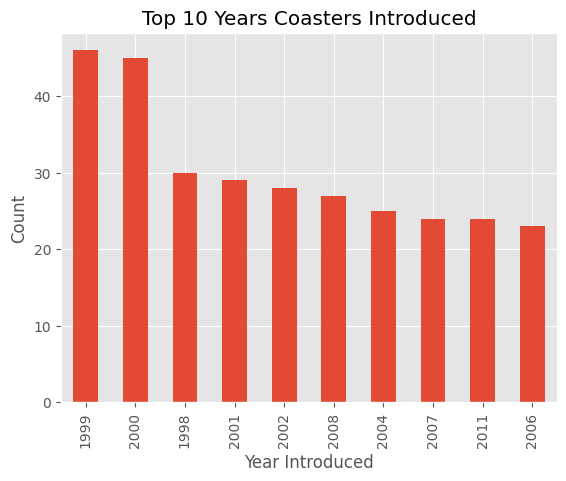

In [ ]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

**how the coaster speeds are distributed — e.g., are most coasters fast or slow?**

Text(0.5, 0, 'Speed (mph)')

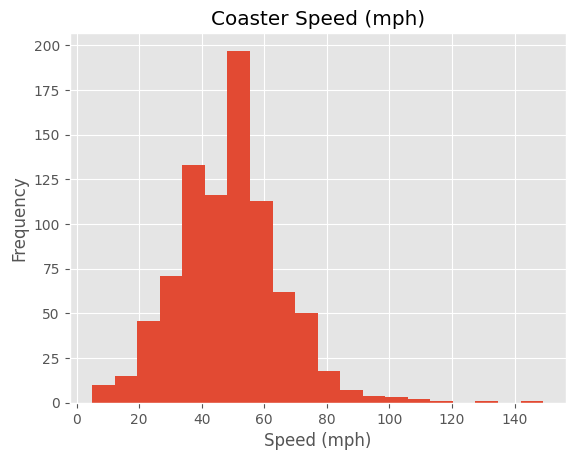

In [ ]:
ax = df['Speed_mph'].plot(kind='hist',
                          bins=20,
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')


**Shape of the speed distribution**

Text(0.5, 0, 'Speed (mph)')

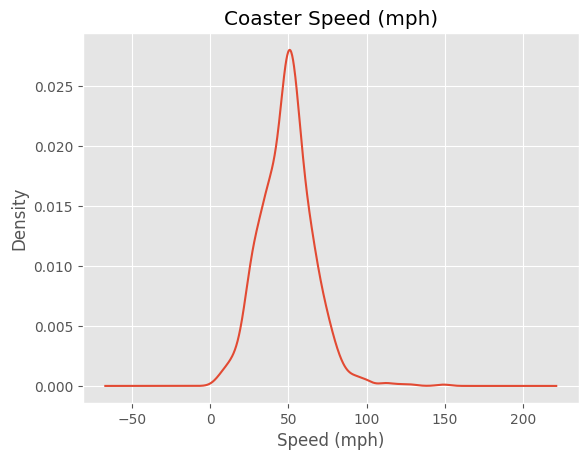

In [ ]:
ax = df['Speed_mph'].plot(kind='kde',
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

**Coaster Types**

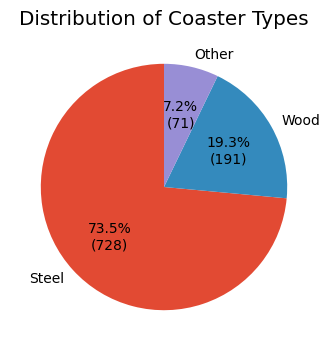

In [ ]:
import matplotlib.pyplot as plt

# Get value counts first
type_counts = df['Type_Main'].value_counts()

# Define custom label formatter
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct

# Plot the pie chart
type_counts.plot(
    kind='pie',
    title='Distribution of Coaster Types',
    autopct=make_autopct(type_counts),
    startangle=90,
    figsize=(4, 4)
)

plt.ylabel('')  # Optional: remove y-label for cleaner look
plt.show()



#**Step 5: Feature Relationships**

**Bivariate Analysis**

**Relationship between speed and height of a coaster**

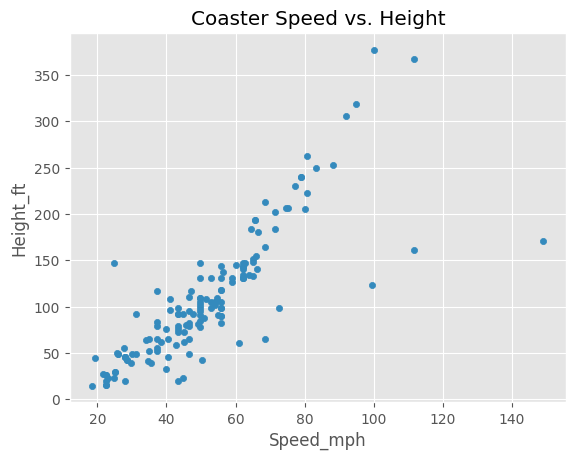

In [ ]:
df.plot(kind='scatter',
        x='Speed_mph',
        y='Height_ft',
        title='Coaster Speed vs. Height')
plt.show()

**Multivariate Analysis**

**Color makes it easy to spot trends over time:Are newer coasters (brighter colors) generally faster or taller?Are older coasters (darker colors) slower or shorter?**



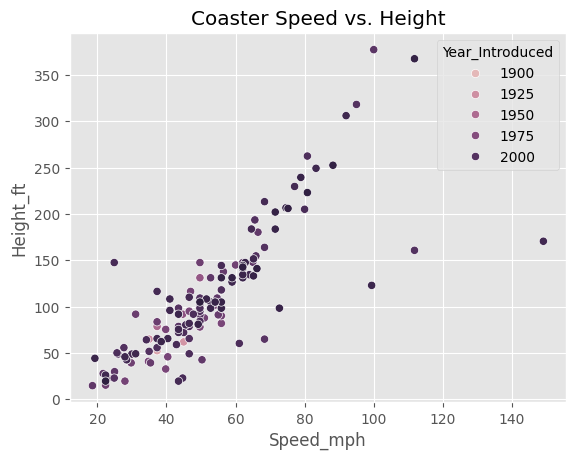

In [ ]:
ax = sns.scatterplot(x='Speed_mph',
                y='Height_ft',
                hue='Year_Introduced',
                data=df)
ax.set_title('Coaster Speed vs. Height')
plt.show()

**Analyzing relationships between multiple numerical features, while also comparing them across coaster types.**

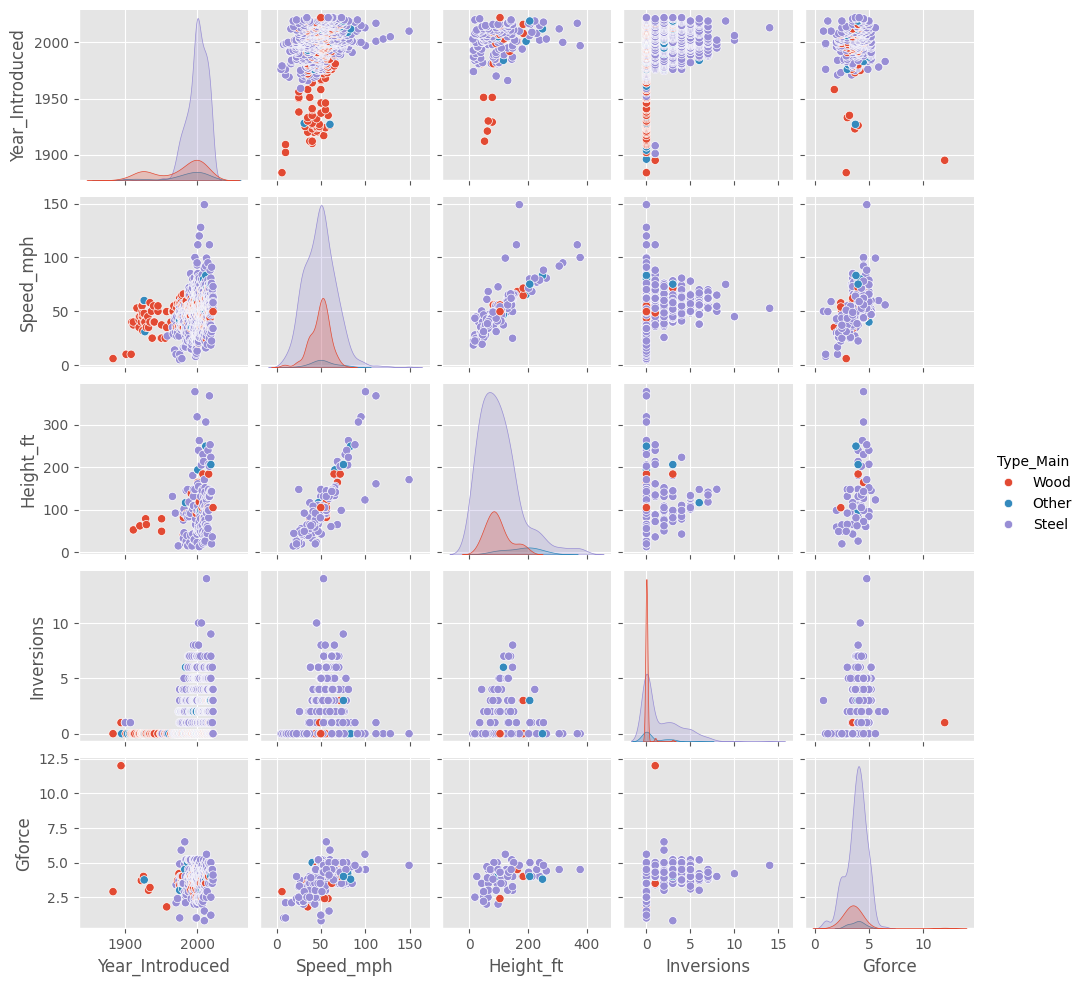

In [ ]:
sns.pairplot(df,
             vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'],
            hue='Type_Main',height=2)
plt.show()

🧠 Observations:
Steel coasters dominate the dataset (most points are purple).

Wooden coasters (red) are mostly older, slower, and lower in height with 0 inversions and lower G-force.

Speed & Height: Taller coasters are often faster (expected due to gravity).

Inversions & Gforce: Coasters with more inversions seem to have slightly higher G-forces.

Year_Introduced vs Speed/Height/Inversions: Newer coasters tend to be faster, taller, and more complex (more inversions).

In [ ]:
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


📊 Correlation Analysis – Key Insights
Speed vs Height: Strong positive correlation (0.73) – taller coasters tend to be faster.

Speed vs G-force: Moderate to strong positive correlation (0.61) – faster coasters produce higher g-forces.

Height vs G-force: Moderate positive correlation (0.47) – taller coasters are often more intense.

G-force vs Inversions: Mild positive correlation (0.28) – more inversions might slightly increase g-force.

Year Introduced vs Speed: Weak positive correlation (0.17) – coasters have become slightly faster over time.

Year Introduced vs Height: Weak positive correlation (0.14) – coaster height has slightly increased with time.

Year Introduced vs Inversions: Weak negative correlation (-0.21) – newer coasters may have fewer inversions.

Inversions vs Speed/Height: Very weak or no correlation (~ -0.03 to -0.08) – inversions don’t depend on speed or height.



<Axes: >

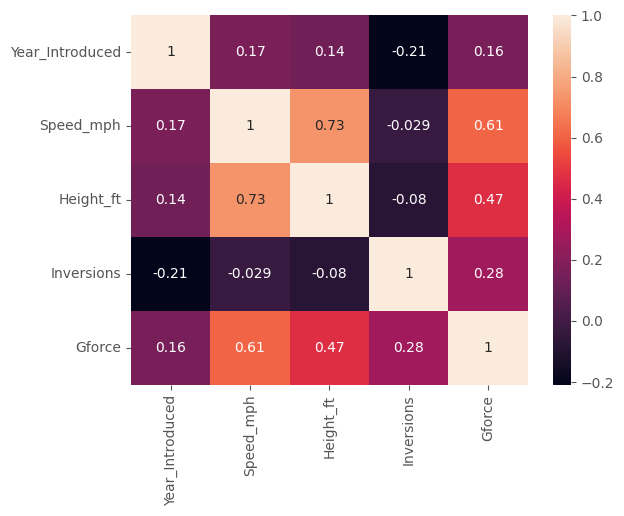

In [ ]:
sns.heatmap(df_corr, annot=True)

📊 Graph Observations (with correlation values):
Speed_mph & Height_ft → 0.73
🔥 Strong positive correlation → taller coasters are usually faster.

Speed_mph & Gforce → 0.61
💪 Moderate to strong correlation → faster coasters generate more g-force.

Height_ft & Gforce → 0.47
👍 Moderate correlation → taller coasters tend to be more intense.

Gforce & Inversions → 0.28
👌 Mild correlation → more inversions may slightly increase g-force.

Year_Introduced & Speed_mph → 0.17
🔍 Weak correlation → newer coasters are slightly faster.

Year_Introduced & Height_ft → 0.14
🔍 Weak correlation → newer coasters are a bit taller.

Year_Introduced & Inversions → -0.21
⬇ Weak negative correlation → newer coasters tend to have fewer inversions.

Inversions & Speed_mph → -0.03
❌ No meaningful correlation → speed doesn't affect number of inversions.

Inversions & Height_ft → -0.08
❌ No meaningful correlation → height doesn't affect inversions much.

#**Step 6: Ask a Question about the data-What are the locations with the fastest roller coasters (minimum of 10)?**

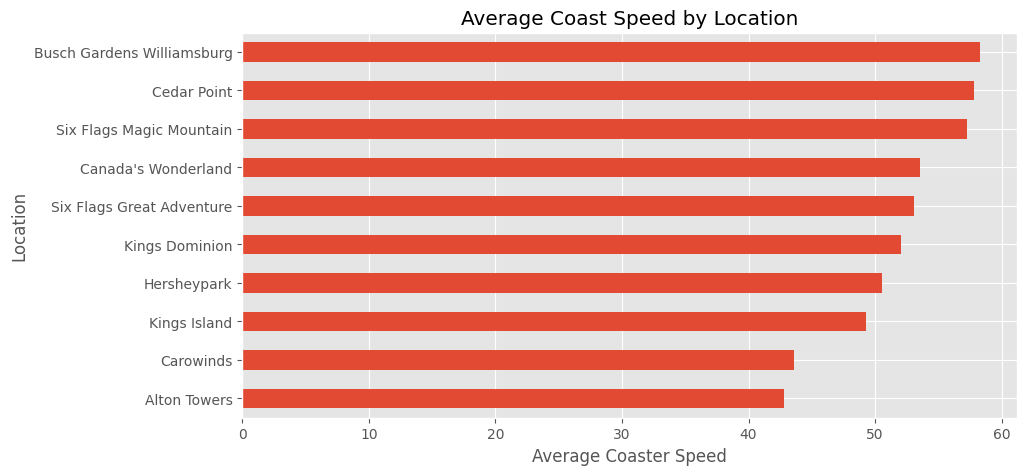

In [ ]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(10, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()